In [ ]:
import pandas as pd #imports python libraries
import matplotlib.pyplot as plt
import ast
from datasets import load_dataset

ds = load_dataset("lukebarousse/data_jobs") #imports data
df = ds['train'].to_pandas() #imports data inot python

/var/folders/bw/hyhwy085297517x3641dn4d80000gn/T/ipykernel_47379/3646507594.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_plot = top_five_skills/df_ds_count[0] * 100 # crates new series of computation results


Text(0.5, 0, 'percent of job postings mentioned')

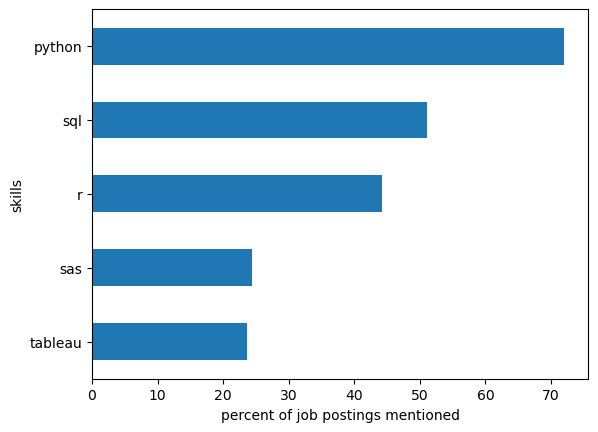

In [141]:
df["job_skills"]= df["job_skills"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x) # cleans job skills

df_ds = df[(df['job_country'] == "United States") & (df["job_title_short"] == "Data Scientist")] # filters for specific job and country

df_ds_exploded = df_ds.explode("job_skills") # creates a row ofr each skill in a job posting

top_five_skills = df_ds_exploded.value_counts("job_skills").sort_values(ascending=False).head(5) # identifies top five skills by mention

df_ds_count = df_ds["job_title_short"].value_counts() # counts job postings by title

df_plot = top_five_skills/df_ds_count[0] * 100 # crates new series of computation results

figure, ax = plt.subplots() #graph
ax = df_plot.sort_values(ascending=True).plot(kind="barh", x="top_five_skills", y="df_plot")
plt.ylabel("skills")
plt.xlabel("percent of job postings mentioned")

In [148]:


df_ds_exploded["job_posted_date"] = pd.to_datetime(df_ds_exploded["job_posted_date"]) #cleans date column

df_ds_exploded["month"] = df_ds_exploded["job_posted_date"].dt.month # creates month column

top_five_skills = df_ds_exploded["job_skills"].value_counts().head(5).index.tolist() # identifies top five Data Science skills by mentions

df_pivot = df_ds_exploded.pivot_table(index="month", columns="job_skills", aggfunc="size") # creates datafram with skills count by month

ds_job_count = df_ds_exploded.pivot_table(index="month", columns="job_title_short", aggfunc="size") 

job_count_series = df_ds.groupby("month").size()

df_topfive = df_pivot[top_five_skills] # convertes dataframe to series for computation

df_topfive.div(job_count_series, axis=0) * 100 # computes arithmetic




KeyError: 'month'